<a href="https://colab.research.google.com/github/Team-No-3/Steering_wheel/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q "tqdm>=4.36.1"
!pip install tensorflow-addons==0.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 37.2 MB/s 


In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
import sklearn
from tqdm import tqdm
import imgaug.augmenters as iaa
import imgaug as ia
from tensorflow.keras.optimizers import Adam
import imageio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import load_img
import os
import cv2

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras import datasets, layers, models

In [ ]:
data_path = "/content/drive/MyDrive/project_3/cnn/"

In [ ]:
train_df = pd.read_csv(data_path + "train.csv")

In [ ]:
train_df

,img_name,tag
0,f60.jpg,error
1,f58.jpg,error
2,f57.jpg,error
3,f56.jpg,error
4,f55.jpg,error
...,...,...
123,5.jpg,normal
124,4.jpg,normal
125,3.jpg,normal
126,2.jpg,normal


In [ ]:
# 비디오의 종류가 저장된 tag 컬럼을 label 컬럼에 대입
train_df["label"] = train_df["tag"]

In [ ]:
# label 컬럼에 저장된 데이터를 중복을 제거하고 조회
train_df["label"].unique()

array(['error', 'normal'], dtype=object)

In [ ]:
# enumerate(train_df["label"].unique()) : label 컬럼에 저장된 데이터를 중복을 제거한 값에 인덱스 추가
for index, data in enumerate(train_df["label"].unique()):
    # label 컬럼에 저장된 data 를 index로 변환
    train_df["label"].replace(data, index, inplace=True) 

In [ ]:
# sklearn.utils.shuffle(train_df) : train_df에 저장된 행을 섞음
train_df = sklearn.utils.shuffle(train_df)

In [ ]:
# 테스트 데이터의 파일명과 종류가 저장된 train.csv 를 읽음
test_df = pd.read_csv(data_path + "test.csv")

In [ ]:
# 비디오의 종류가 저장된 tag 컬럼을 label 컬럼에 대입
test_df["label"] = test_df["tag"]

In [ ]:
# label 컬럼에 저장된 데이터를 중복을 제거하고 조회
test_df["label"].unique()

array(['error', 'normal'], dtype=object)

In [ ]:
# enumerate(test_df["label"].unique()) : label 컬럼에 저장된 데이터를 중복을 제거한 값에 인덱스 추가
for index, data in enumerate(test_df["label"].unique()):
    # label 컬럼에 저장된 data 를 index로 변환
    test_df["label"].replace(data, index, inplace=True) 

In [ ]:
text_label = test_df["tag"].unique()

In [ ]:
text_label

array(['error', 'normal'], dtype=object)

In [ ]:
# sklearn.utils.shuffle(test_df) : test_df에 저장된 행을 섞음
test_df = sklearn.utils.shuffle(test_df)

In [ ]:
#생성자가 생성할 이미지의 세로
img_rows = 256
#생성자가 생성할 이미지의 가로
img_cols = 256
#생성자가 생성할 이미지 채널 (컬러이미지)
channels = 3

# 판별자가 판별할 이미지의 세로 가로 채널
img_shape = (img_rows, img_cols, channels)

# 생성자가 이미지를 생성할 초기 노이즈 개수
z_dim = 256

#이미지 파일 경로
train_path = "/content/drive/MyDrive/project_3/cnn/train/"    

test_path = "/content/drive/MyDrive/project_3/cnn/test/"

error_path = "/content/drive/MyDrive/project_3/cnn/error/"    

In [ ]:
# 이미지의 가운데 부분을 리턴
# image : 이미지
def crop_center_square(image):
    return image[700 : 1000, 400 : 700]

In [ ]:
# # 폴더의 이미지 파일을 읽어서 배열에 담아서 리턴
# # path : 이미지 파일 경로
# # resize=(img_rows, img_cols) : 이미지의 세로 가로
# def load_images(path, resize=(img_rows, img_cols)):
#     #path에 저장된 이미지 파일의 이름을 image_name_list에 저장
#     image_name_list = os.listdir(path)
#     #이미지의 개수를 저장
#     image_num = len(image_name_list)

#     # (이미지개수, 256(img_rows), 256(img_cols), 3(channels)) 인 0으로 초기화된 배열 생성
#     all_imge_arr = np.zeros((image_num,img_rows, img_cols, channels),dtype="float32")

#     #파일 이름 개수 만큼 반복
#     for index in range(len(image_name_list)):
#         #index번째 파일 이름 리턴
#         image_name = image_name_list[index]
#         #파일 경로명과 파일 이름 합치기
#         image_path = path+image_name
#         #이미지 파일을 읽어서 리턴
#         image_arr = cv2.imread(image_path)
#         #이미지 가운데 리턴
#         image_arr = crop_center_square(image_arr)
#         #이미지의 가로 세로를 resize=(256,256) 로 변환
#         image_arr = cv2.resize(image_arr, resize)
#         # image_arr 은  [줄, 칸, B(파랑) G(녹색) R(빨강) ] 로 구성되 있음 
#         # image_arr [ : (모든줄), : (모든칸), R (인덱스2) G (인덱스1) B (인덱스0 )] 리턴
#         image_arr = image_arr[:, :, [2, 1, 0]]
            
#         # image_arr을 all_imge_arr에 추가
#         all_imge_arr[index]=image_arr

#     #전체 이미지 파일 리턴        
#     return all_imge_arr


In [ ]:
# 폴더의 이미지 파일을 읽어서 배열에 담아서 리턴
# path : 이미지 파일 경로
# resize=(img_rows, img_cols) : 이미지의 세로 가로
def load_images(path, resize=(img_rows, img_cols)):

    #이미지 파일을 읽어서 리턴
    image_arr = cv2.imread(path)
    #이미지 가운데 리턴
    image_arr = crop_center_square(image_arr)
    #이미지의 가로 세로를 resize=(256,256) 로 변환
    image_arr = cv2.resize(image_arr, resize)
    # image_arr 은  [줄, 칸, B(파랑) G(녹색) R(빨강) ] 로 구성되 있음 
    # image_arr [ : (모든줄), : (모든칸), R (인덱스2) G (인덱스1) B (인덱스0 )] 리턴
    image_arr = image_arr[:, :, [2, 1, 0]]

            


    #전체 이미지 파일 리턴        
    return image_arr


In [ ]:
data_path+"train/"+train_df["img_name"].loc[0]

'/content/drive/MyDrive/project_3/cnn/train/f60.jpg'

In [ ]:
# 비디오 파일의 프레임을 이미지로 변환해서 리턴
video = load_images(data_path+"train/"+train_df["img_name"].loc[0])

In [ ]:
seq = iaa.Sequential([
    iaa.Resize({"height": img_rows, "width": img_cols}),
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        # Blur each image with varying strength using
        # gaussian blur (sigma between 0 and 3.0),
        # average/uniform blur (kernel size between 2x2 and 7x7)
        # median blur (kernel size between 3x3 and 11x11).
        iaa.OneOf([
            iaa.GaussianBlur((0, 3.0)),
            iaa.AverageBlur(k=(2, 7)),
            iaa.MedianBlur(k=(3, 11)),
            ]),
    ),
    iaa.Sometimes(
        0.3,
        #Either drop randomly 1 to 10% of all pixels (i.e. set
        # them to black) or drop them on an image with 2-5% percent
        # of the original size, leading to large dropped
        # rectangles.
        iaa.OneOf([
            iaa.Dropout((0.01, 0.1), per_channel=0.5),
            iaa.CoarseDropout(
                (0.03, 0.15), size_percent=(0.02, 0.05),
                per_channel=0.2
            ),
        ]),
    ),
    # crop some of the images by 0-10% of their height/width
    iaa.Sometimes(0.3 ,iaa.Crop(percent=(0, 0.1))),
    
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order


In [ ]:
generate_img = seq(image = video)

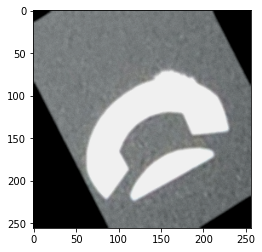

In [ ]:
plt.imshow(generate_img)

In [ ]:
# #이미지를 출력할 객체

# fig = plt.figure(figsize=(10, 10))

# for i in range(1):
#     #4줄 5칸으로 나누고 i+1번째 이미지를 그림
#     subplot = fig.add_subplot(4, 5, i + 1)

    
#     #subplot.set_xticks([]) : 그래프의 x축을 설정 
#     #데이터가 없으므로 x축에 아무 데이터도 출력 안됨
#     subplot.set_xticks([])
    
#     #subplot.set_yticks([]) : 그래프의 y축을 설정 
#     #데이터가 없으므로 y축에 아무 데이터도 출력 안됨
#     subplot.set_yticks([])   
    
#     #증강된 이미지 출력 (X_train[0]을 회전 이동으로 데이터가 많은것 같은 효과를 줌)
#     subplot.imshow(generate_img[i])
# #그래프를 화면에 그림
# plt.show()

In [ ]:
# # 비디오 파일을 읽어서 각 프레임을 이미지로 변환해서 리턴
# # path : 비디오 파일 경로
# # max_frames : 이미지로 변환할 프레임수
# # resize=(IMG_SIZE, IMG_SIZE) : 이미지의 가로 세로
# def load_images(path):
#     cap = cv2.imread(path)

#     frames = []
#     frame = cap
#     frame = frame[:, :, [2, 1, 0]]
#     frames.append(frame)


#     return np.array(frames, dtype=np.uint8)


In [ ]:
# for i in range(len(train_df)):
#   image = []
#   cap = cv2.imread(data_path+"train/"+train_df["img_name"].loc[i])
#   image.append(cap)

In [ ]:
# image_path = train_df["img_name"].values.tolist()
# for index, path in tqdm( enumerate(image_path) ):
#   print(index)
#   print(path)

In [ ]:
# 모든 비디오 파일의 이미지와 종류를 리턴
# video_name : 비디오 파일명
# label: 비디오 파일 종류
# root_dir : 비디오 파일 경로
def prepare_all_images(image_name , label, root_dir, is_train):
    # 비디오 파일 이름의 개수
    num_samples = len(image_name)
    # video_name.values.tolist() : 비디오 파일 이름을 리스트로 변환 해서 리턴
    image_path = image_name.values.tolist()
    # 비디오 종류를 리턴
    labels = label.values
    # 비디오 종류를 2차원 배열로 변환
    labels = labels.reshape(-1,1)
    # 0으로 초기화된 [비디오 파일개수 , 20 , 224 , 224, 3] 배열 생성
    x = np.zeros(shape=(num_samples, img_rows, img_cols, 3 ), dtype="float32" )
    # 0으로 초기화된 [비디오파일개수] 인 배열 생성
    y = np.zeros(shape=(num_samples), dtype="float32")

    # 비디오 파일의 개수 만큼 반복
    for index, path in tqdm( enumerate(image_path) ):
        # 비디오 파일을 읽어서 비디오 이미지를 리턴
        images = load_images(root_dir + path)
        # 학습데이터 일때 이미지 증강 (테스트 데이터는 증강 않함)
        if is_train:
            #video에 저장된 20개의 이미지를 증강
            images = seq(image=images)

        # video를  x에 추가
        x[index] = np.array(images / 255, dtype="float32")
        # 비디오의 종류가 저장된 labels의 index 번째를 y에 추가
        y[index]= np.array(labels[index], dtype="float32")
        
    # 전체 비디오 프레임을 이미지로 변환한 x 
    # to_categorical(y) : 이미지의 종류 y 를 onehot 인코딩 
    return (x,to_categorical(y))

In [ ]:
# 비디오 프레임을 이미지로 변환한 데이터를 X_train에 저장
# 비디오 프레임 이미지의 종류를 y_train에 저장
X_train, y_train = prepare_all_images(train_df["img_name"], 
                                      train_df["label"] ,
                                      data_path + "train/",
                                      True)

128it [02:20,  1.09s/it]


In [ ]:
# #이미지를 읽어서 X_train에 저장
# X_train = load_images(train_path)
# train_images = X_train

In [ ]:
# 비디오 프레임을 이미지로 변환한 데이터를 X_test에 저장
# 비디오 프레임 이미지의 종류를 y_test에 저장
X_test, y_test = prepare_all_images(test_df["img_name"], 
                                      test_df["label"] ,
                                      data_path + "test/",
                                    False)

17it [00:18,  1.07s/it]


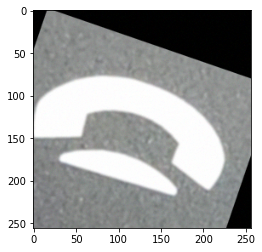

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# X_test = load_images(test_path)
# test_images = X_test

In [ ]:
# X_error = load_images(error_path)
# error_images = X_error

In [ ]:
# a = [1]
# b = [0]
# c = a * len(X_train)
# d = a * len(X_test)
# e = b * len(X_error)
# train_labels = np.array(c, dtype = np.uint8)
# test_labels = np.array(d, dtype = np.uint8)
# error_labels = np.array(e, dtype = np.uint8)

In [ ]:
# # sklearn.utils.shuffle(train_df) : train_df에 저장된 행을 섞음
# train_df = sklearn.utils.shuffle(train_df)

In [ ]:
# train_images = train_images.reshape((-1, 256, 256, 3))
# test_images = test_images.reshape((-1, 256, 256, 3))

# # 픽셀 값을 0~1 사이로 정규화합니다.
# train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# plt.imshow(train_images[0])

In [ ]:
#VGG16 구조를 갖는 Model생성
conv_layers = Xception(
                    weights='imagenet', # 이미지넷 대회에서 학습한 필터의 weight 그대로 사용
                    include_top=False,  # 맨 마지막의 100개로 분류하는 선형회귀 삭제
                    input_shape=(img_rows, img_cols, 3) # 이미지의 IMG_SIZE 세로 IMG_SIZE 가로 3(컬러)
                    )

83683744/83683744 [==============================] - 6s 0us/step


In [ ]:
# # # 0 ~ 14번째 레이어 까지 이미지넷 대회의 필터를 그대로 사용 
# for layer in conv_layers.layers:
#     # 해당 레이어의 weight는 수정하지 않고 이미지넷 대회의 값 그대로 사용 
#     layer.trainable = False

In [ ]:
model = Sequential()

In [ ]:
model.add((conv_layers ))

In [ ]:
# model.add((Flatten()))

In [ ]:
model.add(Dropout(0.7))

In [ ]:
# # # LSTM 실행
# model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.5))

In [ ]:
# model.add(Dense(32, activation="relu"))

In [ ]:
# model.add(Dropout(0.7))

In [ ]:
# model.add(Dense(2, activation="softmax"))

In [ ]:
# #생성된 모델 정보 출력
# model.summary()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.7))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f84ccbd8250>>

In [ ]:
#GradientDecnet를 이용해서 w1,w2,w3,w4를 찾는 방법을 설정함
#loss='categorical_crossentropy' : -(y * tf.log(hypothesis1)) 합 이 최소가 되는 w1,w2,w3,w4 를 찾음
#optimizer=Adam(lr=1e-5) : learning rate를 0.00001 로 설정
model.compile(
                  loss="categorical_crossentropy", 
                   optimizer=Adam(learning_rate=1e-5),
                   metrics=["acc"]
              )

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [ ]:
#모델 학습
history = model.fit(
			X_train , #독립변수
            y_train,  #종속 변수
            batch_size = 16, # batch_size 4
            epochs = 100,# 20번 반복
            validation_data=(X_test,y_test)
          # callbacks=[tqdm_callback], # 학습시 가장 loss가 낮은 모델을 저장하도록 설정 
	)

Epoch 1/100
8/8 [==============================] - 1s 55ms/step - loss: 0.5049 - acc: 0.7734 - val_loss: 0.6571 - val_acc: 0.5294
Epoch 2/100
8/8 [==============================] - 0s 48ms/step - loss: 0.4867 - acc: 0.8594 - val_loss: 0.6573 - val_acc: 0.5294
Epoch 3/100
8/8 [==============================] - 0s 48ms/step - loss: 0.4772 - acc: 0.8359 - val_loss: 0.6579 - val_acc: 0.5294
Epoch 4/100
8/8 [==============================] - 0s 48ms/step - loss: 0.4819 - acc: 0.8125 - val_loss: 0.6559 - val_acc: 0.5294
Epoch 5/100
8/8 [==============================] - 0s 49ms/step - loss: 0.4763 - acc: 0.8594 - val_loss: 0.6536 - val_acc: 0.5294
Epoch 6/100
8/8 [==============================] - 0s 49ms/step - loss: 0.4697 - acc: 0.8516 - val_loss: 0.6563 - val_acc: 0.5294
Epoch 7/100
8/8 [==============================] - 0s 49ms/step - loss: 0.4790 - acc: 0.8203 - val_loss: 0.6516 - val_acc: 0.5294
Epoch 8/100
8/8 [==============================] - 0s 48ms/step - loss: 0.4573 - acc: 0.85

In [ ]:
#best_model을 이용해 정확도 계산
model.evaluate(X_test, y_test, batch_size=1)

17/17 [==============================] - 0s 4ms/step - loss: 0.7369 - acc: 0.5294


[0.7368714213371277, 0.529411792755127]

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

1/1 - 0s - loss: 0.7369 - acc: 0.5294 - 34ms/epoch - 34ms/step


In [ ]:
# 0번째 비디오 프레임 이미지
frame = X_train[0:1]
# print("video_name = ", test_df.loc[0, "video_name"])
# 비디오 프레임 이미지의 종류 예측
predict01 = model.predict(frame)
# print("predict01 = ", predict01)
# 최고값이 있는 인덱스 조회
predict02 = np.argmax(predict01, axis=1)
# print("predict02 = ", predict02)
# 이미지의 종류 조회
text_predict = text_label[predict02]

# print("text_predict=", text_predict)

1/1 [==============================] - 0s 34ms/step


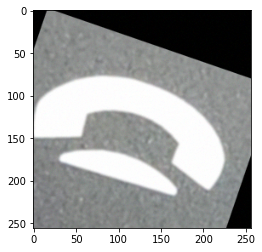

In [ ]:
# 0번째 비디오 프레임 이미지 image에 대입
image = frame[0].copy()
plt.imshow(image)

In [ ]:
# 이미지의 종류
str = "Activity :{}".format(text_predict)
# str을 출력할 이미지 좌표
org=(0,20) 
# 이미지 폰트
font=cv2.FONT_HERSHEY_PLAIN
# image에 str을 출력
cv2.putText(image, str,org,font, 1 ,(255,0, 0) , 2)

array([[[0.01960784, 0.01568628, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00784314, 0.00784314, 0.02745098],
        [0.01176471, 0.00392157, 0.        ],
        [0.01176471, 0.00784314, 0.        ],
        ...,
        [0.00784314, 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ]],

       [[0.        , 0.00392157, 0.00784314],
        [0.        , 0.00784314, 0.00392157],
        [0.00392157, 0.01176471, 0.02352941],
        ...,
        [0.00392157, 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00784314, 0.        ]],

       ...,

       [[0.49803922, 0.49019608, 0.49803922],
        [0.49411765, 0.49411765, 0.52156866],
        [0.5019608 , 0

In [ ]:
text_label

array(['error', 'normal'], dtype=object)

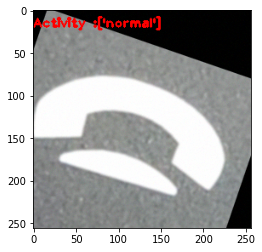

In [ ]:
# image에 str (영상 종류 예측값 ) 출력
plt.imshow(image)

In [ ]:
# 테스트 데이터의 파일명과 종류가 저장된 train.csv 를 읽음
error_df = pd.read_csv(data_path + "error.csv")

In [ ]:
# 비디오의 종류가 저장된 tag 컬럼을 label 컬럼에 대입
error_df["label"] = error_df["tag"]

In [ ]:
# label 컬럼에 저장된 데이터를 중복을 제거하고 조회
error_df["label"].unique()

array(['error'], dtype=object)

In [ ]:
# enumerate(test_df["label"].unique()) : label 컬럼에 저장된 데이터를 중복을 제거한 값에 인덱스 추가
for index, data in enumerate(error_df["label"].unique()):
    # label 컬럼에 저장된 data 를 index로 변환
    error_df["label"].replace(data, index, inplace=True) 

In [ ]:
# 비디오 프레임을 이미지로 변환한 데이터를 X_test에 저장
# 비디오 프레임 이미지의 종류를 y_test에 저장
new_X_test, new_y_test = prepare_all_images(error_df["img_name"], 
                                      error_df["label"] ,
                                      data_path + "error/",
                                    False)

2it [00:01,  1.01it/s]


In [ ]:
# 0번째 비디오 프레임 이미지
frame = new_X_test[1:2]
# print("video_name = ", test_df.loc[0, "video_name"])
# 비디오 프레임 이미지의 종류 예측
predict01 = model.predict(frame)
# print("predict01 = ", predict01)
# 최고값이 있는 인덱스 조회
predict02 = np.argmax(predict01, axis=1)
# print("predict02 = ", predict02)
# 이미지의 종류 조회
text_predict = text_label[predict02]

# print("text_predict=", text_predict)

1/1 [==============================] - 0s 34ms/step


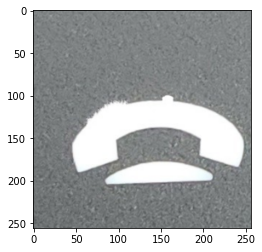

In [ ]:
# 0번째 비디오 프레임 이미지 image에 대입
image = frame[0].copy()
plt.imshow(image)

In [ ]:
# 이미지의 종류
str = "Activity :{}".format(text_predict)
# str을 출력할 이미지 좌표
org=(0,20) 
# 이미지 폰트
font=cv2.FONT_HERSHEY_PLAIN
# image에 str을 출력
cv2.putText(image, str,org,font, 1 ,(255,0, 0) , 2)

array([[[0.5058824 , 0.52156866, 0.5254902 ],
        [0.49411765, 0.50980395, 0.5137255 ],
        [0.5254902 , 0.5411765 , 0.54509807],
        ...,
        [0.5058824 , 0.52156866, 0.5254902 ],
        [0.49411765, 0.50980395, 0.5137255 ],
        [0.5058824 , 0.5254902 , 0.5294118 ]],

       [[0.5137255 , 0.5294118 , 0.53333336],
        [0.4745098 , 0.49019608, 0.49411765],
        [0.47843137, 0.49411765, 0.49803922],
        ...,
        [0.52156866, 0.5372549 , 0.5411765 ],
        [0.5058824 , 0.52156866, 0.5254902 ],
        [0.5137255 , 0.5294118 , 0.53333336]],

       [[0.50980395, 0.5254902 , 0.5294118 ],
        [0.4745098 , 0.49019608, 0.49411765],
        [0.45882353, 0.4745098 , 0.47843137],
        ...,
        [0.5254902 , 0.5372549 , 0.5411765 ],
        [0.5137255 , 0.5294118 , 0.53333336],
        [0.5137255 , 0.53333336, 0.53333336]],

       ...,

       [[0.40784314, 0.42352942, 0.42745098],
        [0.44313726, 0.45882353, 0.4627451 ],
        [0.45490196, 0

In [ ]:
text_label

array(['error', 'normal'], dtype=object)

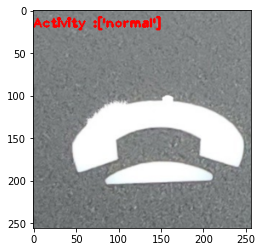

In [ ]:
# image에 str (영상 종류 예측값 ) 출력
plt.imshow(image)